# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
import pickle

training_file = 'train_test_data_set/train.p'
testing_file = 'train_test_data_set/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

print("Updated Image Shape: {}".format(X_train[0].shape))

label_list = (y_train.tolist())

Updated Image Shape: (32, 32, 3)


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [2]:
n_train = len(X_train)

n_test = len(X_test)

image_shape = X_train[0].shape

n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

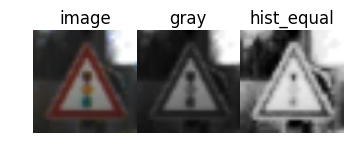

In [3]:
import matplotlib.pyplot as plt
import random
import numpy as np
import cv2
%matplotlib inline


fig, axs = plt.subplots(1, 3, figsize=(4, 4))
fig.subplots_adjust(hspace = .2, wspace=.001)
axs = axs.ravel()
for i in range(0, 3, 3):
    index = random.randint(0, len(X_train))
    image = X_train[index]
    
    axs[i].axis('off')
    axs[i].imshow(image)
    axs[i].set_title("image")

    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    axs[i+1].axis('off')
    axs[i+1].imshow(gray, cmap='gray')
    axs[i+1].set_title("gray")

    equ = cv2.equalizeHist(gray)
    axs[i+2].axis('off')
    axs[i+2].imshow(equ, cmap='gray')
    axs[i+2].set_title("hist_equal")

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

[]

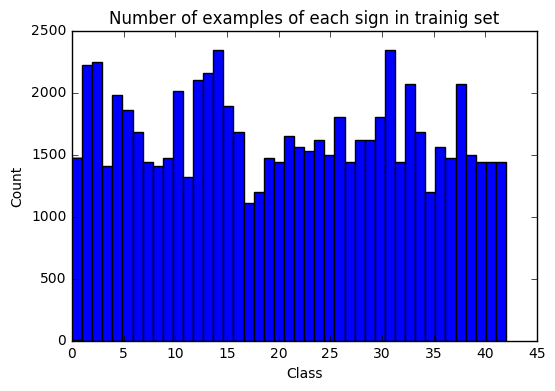

In [5]:
import tensorflow as tf
from numpy import newaxis
import cv2
import scipy.ndimage
import numpy as np

X_train_gray = np.array([cv2.cvtColor(image, cv2.COLOR_RGB2GRAY) for image in X_train])
X_test_gray = np.array([cv2.cvtColor(image, cv2.COLOR_RGB2GRAY) for image in X_test])

X_train_hist = np.array([cv2.equalizeHist(image) for image in X_train_gray])
X_test_hist = np.array([cv2.equalizeHist(image) for image in X_test_gray])

X_train_reshaped = X_train_hist[..., newaxis]
X_test_reshaped = X_test_hist[..., newaxis]

X_train_normalized = X_train_reshaped - np.mean(X_train_reshaped)
X_test_normalized = X_test_reshaped - np.mean(X_test_reshaped)

def augment(image):
    if (random.choice([True, False])):
        image = scipy.ndimage.interpolation.shift(image, [random.randrange(-2, 2), random.randrange(-2, 2), 0])
    else:
        image = scipy.ndimage.interpolation.rotate(image, random.randrange(-10, 10), reshape=False)
    return image


new_features = []
new_labels = []

for i in range(n_classes):
    class_sample_count = label_list.count(i)
    multiplier = round(1250 / class_sample_count)

    if class_sample_count >= 1000:
        continue
    
    for train_feature, train_label in zip(X_train_normalized, y_train):
        if i == train_label:
            for n in range (multiplier):
                new_features.append(augment(train_feature))
                new_labels.append(train_label)
                
X_train_augment = np.append(np.array(X_train_normalized), np.array(new_features), axis=0)
y_train_augment = np.append(np.array(y_train), np.array(new_labels), axis=0)

EPOCHS = 100
BATCH_SIZE = 350

plt.hist(y_train_augment, bins= n_classes)
plt.title('Number of examples of each sign in trainig set')
plt.xlabel('Class')
plt.ylabel('Count')
plt.plot()

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:** First off I applied a grayscale on all images (I tried color and grayscale images and grayscaling them didn't change the accuracy so I sticked with it). Then I used a histogram equalization to bring every image to the same brightness and add some contrast. Then I normalize everything to improve learning and getting smaller weights (which I don't think is necessary in this application, but it impoved performance a little bit).

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

X_train, X_validation, y_train, y_validation = train_test_split(X_train_augment, y_train_augment, test_size= 0.2, random_state=0)

X_train, y_train = shuffle(X_train, y_train)

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**For validation data I took 20% of the original training data and split that up, as recommended. Testing data is not used for training as it could influence the results. I did generate additional data, because some classes were underrepresented. This could lead to a worse training accuracy. So I bumped every class with small dataset up by multiplying its class dataset by a factor. To not just copy images I used scipy to shift and rotate images in a random manner. Now every class is above 1000 images and this actually boosts training accuracy by quiet a lot. 

In [7]:
from tensorflow.contrib.layers import flatten

def cnn(x):
    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1

    #Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x12.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 12), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(12))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    #Activation and Dropout
    conv1 = tf.nn.relu(conv1)
    conv1 = tf.nn.dropout(conv1, 0.5)

    #Pooling. Input = 28x28x12. Output = 14x14x12.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    #Layer 2: Convolutional. Output = 12x12x24.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 12, 24), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(24))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b

    #Activation.
    conv2 = tf.nn.relu(conv2)

    #Pooling. Input = 12x12x24. Output = 6x6x24.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    #Layer 3: Convolutional. Input = 6x6x24. Output = 4x4x48
    conv3_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 24, 48), mean = mu, stddev = sigma))
    conv3_b = tf.Variable(tf.zeros(48))
    conv3   = tf.nn.conv2d(conv2, conv3_W, strides=[1, 1, 1, 1], padding='VALID') + conv3_b

    #Activation.
    conv3 = tf.nn.relu(conv3)

    #Pooling. Input = 4x4x48. Output = 2x2x48.
    conv3 = tf.nn.max_pool(conv3, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    #Flatten. Input = 2x2x48. Output = 192.
    fc0   = flatten(conv3)

    #Layer 3: Fully Connected. Input = 192. Output = 142.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(192, 142), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(142))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b

    #Activation.
    fc1    = tf.nn.relu(fc1)

    #Layer 4: Fully Connected. Input = 142. Output = 92.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(142, 92), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(92))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b

    #Activation.
    fc2    = tf.nn.relu(fc2)

    #Layer 5: Fully Connected. Input = 92. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(92, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b

    return logits

x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**So my final architecture consists of three convolutional layers, each followed by a relu activation and a maxpooling application. After that all gets flatten and run through three fully connected layers each followed by a relu activation. The maps for the convolutional layers are 12, 24, 48. Used filters are one 5x5 and two 3x3 filter for the convolutional layers and 2x2 for the max pooling. I also incorporated a dropout function right after the first convolutional layer to reduce overfitting.

In [8]:
for i in range(EPOCHS):
    rate = 0.001*(0.9932**(i))

logits = cnn(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.RMSPropOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './cnn3')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.214

EPOCH 2 ...
Validation Accuracy = 0.519

EPOCH 3 ...
Validation Accuracy = 0.655

EPOCH 4 ...
Validation Accuracy = 0.739

EPOCH 5 ...
Validation Accuracy = 0.790

EPOCH 6 ...
Validation Accuracy = 0.844

EPOCH 7 ...
Validation Accuracy = 0.873

EPOCH 8 ...
Validation Accuracy = 0.894

EPOCH 9 ...
Validation Accuracy = 0.909

EPOCH 10 ...
Validation Accuracy = 0.909

EPOCH 11 ...
Validation Accuracy = 0.930

EPOCH 12 ...
Validation Accuracy = 0.939

EPOCH 13 ...
Validation Accuracy = 0.941

EPOCH 14 ...
Validation Accuracy = 0.949

EPOCH 15 ...
Validation Accuracy = 0.935

EPOCH 16 ...
Validation Accuracy = 0.954

EPOCH 17 ...
Validation Accuracy = 0.957

EPOCH 18 ...
Validation Accuracy = 0.957

EPOCH 19 ...
Validation Accuracy = 0.961

EPOCH 20 ...
Validation Accuracy = 0.968

EPOCH 21 ...
Validation Accuracy = 0.969

EPOCH 22 ...
Validation Accuracy = 0.969

EPOCH 23 ...
Validation Accuracy = 0.956

EPOCH 24 ...
Validation Accura

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**For optimizers I used AdamOptimizer and RMSOptimizer. I experienced that RMSOptimizer "jumps" around a little bit. Where as AdamOptimizer doesn't do that a lot, but can get stuck at local minima in rare occasions. Batch size is 350 and I used 100 epochs. My learning rate is not static, I wanted something that over time reduces its learning rate. So I came up with this idea of a "dynamic" learning rate. I used epochs to reduce my learning rate over time. At epoch 100 my learning rate roughly reduces to about half of its initial rate. I did this to get closer to a perfect global minimum without sacrificing fast learning in the beginning and to avoid getting stuck at a local minima because of a static low learning rate.

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**It definitely was a process of trail and error. At first I didn't used any preprocessing and no additional data and my accuracy wasn't that great, then it also started to overfit. With implementing all of the described above I was able to get significantly increased accuracy rates and also more stable/reproducible accuracy rates. Initially I wanted to use the LeNet architecture, because I think it's well suited for this application. But I wanted to do something personal so I added a additional convolutional layer and a dropout as well as increasing the map size of each convolutional layer. Overall I experimented a lot with a variety of parameters and architectures, which was quiet fun actually! (My best results for training were 99.0% accuracy on the training data and 93.4% accuracy on the test data)

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

In [9]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    
    test_accuracy = evaluate(X_test_normalized, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.931


### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

Predicted classes: [38 12 15 17 17  5]


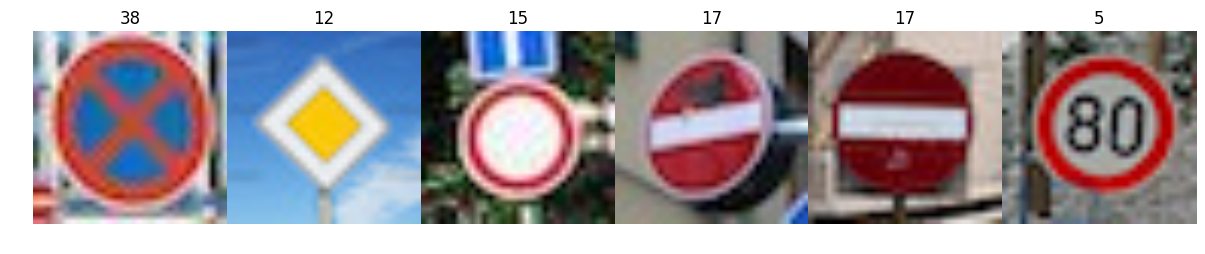

In [10]:
import os
import matplotlib.image as mpimg
import numpy as np
import cv2
import tensorflow as tf
from numpy import newaxis

images = np.array([mpimg.imread("Images1/" + imageName) for imageName in os.listdir("Images1")])
images_gray = np.array([cv2.cvtColor(image, cv2.COLOR_RGB2GRAY) for image in images])
images_abs = np.array([cv2.convertScaleAbs(image) for image in images_gray])
images_hist = np.array([cv2.equalizeHist(image) for image in images_abs])
images_reshaped = images_hist[..., newaxis]
images_normalized = images_reshaped - np.mean(images_reshaped)

predict = tf.argmax(logits, 1)

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    
    predict_output = sess.run(predict, feed_dict={x: images_normalized})
    print("Predicted classes:", predict_output)

    count = len(images)
    fig, axs = plt.subplots(1, 6, figsize=(15, 10))
    fig.subplots_adjust(hspace = .2, wspace=.001)
    axs = axs.ravel()
    for i in range(0, count):
        image = images[i]
        evaluated = predict_output[i]

        axs[i].axis('off')
        axs[i].set_title(evaluated)
        axs[i].imshow(image)


### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**So I choose five traffic signs, all clearly visible (besides one with something on it and one sign unknown to the system). Prediction were spot on besides one.

### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**The accuracy of the given images were 100% right, except the unknown ("no parking")-sign, which has classified as a keep right sign.

In [11]:
prep_images = images_normalized[0:6]

top_k = tf.nn.top_k(tf.nn.softmax(logits), k= 3)

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    top_k_output = sess.run(top_k, feed_dict={x: prep_images})
    
    print(top_k_output)

TopKV2(values=array([[  8.88312161e-01,   1.05121456e-01,   5.81000792e-03],
       [  1.00000000e+00,   1.73827196e-36,   8.43595745e-38],
       [  9.99569118e-01,   2.96527927e-04,   1.25466380e-04],
       [  1.00000000e+00,   4.07133455e-26,   4.32643370e-32],
       [  1.00000000e+00,   4.86817408e-28,   9.70486961e-32],
       [  9.98737752e-01,   1.26216095e-03,   9.76443744e-08]], dtype=float32), indices=array([[40, 38, 37],
       [12, 42, 17],
       [15,  3,  5],
       [17, 39, 14],
       [17, 39, 12],
       [ 5,  7,  2]], dtype=int32))


### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**Given that 5 out of 6 images were pretty easy to recognise, the softmax probabilities were really high. The most uncertain predictions were given on the unknown sign with 62.9% certainty for the class: Keep right. Which is false but the computer doesn't know this sign so it's normal that the certainty is low and prediction false.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.